In [204]:
import pandas as pd

In [205]:
df = pd.read_csv("AirPassengers.csv")

In [206]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [207]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [208]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [209]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [210]:
df.index = df['Month']
del df['Month']
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [211]:
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

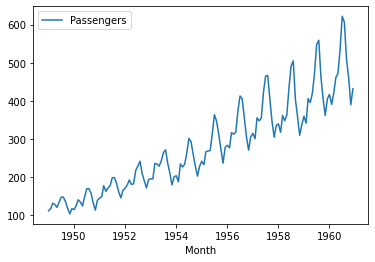

In [212]:
import seaborn as sns 
#sns.lineplot(x=df.index, y='Passengers', data=df)
sns.lineplot(data=df)

In [213]:
slp = (df.iloc[-1,0] - df.iloc[0,0]) / (len(df)-1)

In [214]:
import numpy as np
df['SimpleSlope'] = np.linspace(df.iloc[0,0], df.iloc[-1,0], len(df))
df.head()

,Passengers,SimpleSlope
Month,,
1949-01-01,112,112.000000
1949-02-01,118,114.237762
1949-03-01,132,116.475524
1949-04-01,129,118.713287
1949-05-01,121,120.951049


<AxesSubplot:xlabel='Month'>

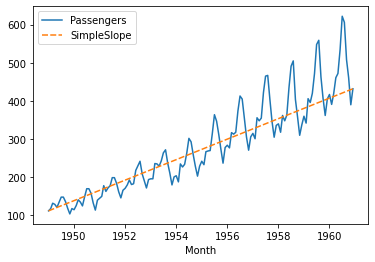

In [215]:
sns.lineplot(data=df)

In [216]:
df['Trend'] = range(1,len(df)+1)
df.head()

,Passengers,SimpleSlope,Trend
Month,,,
1949-01-01,112,112.000000,1
1949-02-01,118,114.237762,2
1949-03-01,132,116.475524,3
1949-04-01,129,118.713287,4
1949-05-01,121,120.951049,5


In [217]:
import statsmodels.formula.api as sm

model = sm.ols(formula="Passengers ~ Trend", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Mon, 23 May 2022   Prob (F-statistic):           4.02e-61
Time:                        16:46:54   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.6528      7.716     11.359      0.000      72.399     102.907
Trend          2.6572      0.092     28.778      0.000       2.475       2.840
==============================================================================
Omnibus:                       24.637   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.905
Skew:                           0.940   Prob(JB):                     4.34e-08
Kurtosis:                       4.454   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
results.params[1]

2.657183908045976

In [219]:
df['OLSSlope'] = results.params[0] + df['Trend']*results.params[1]
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope
Month,,,,
1949-01-01,112,112.000000,1,90.309962
1949-02-01,118,114.237762,2,92.967146
1949-03-01,132,116.475524,3,95.624330
1949-04-01,129,118.713287,4,98.281513
1949-05-01,121,120.951049,5,100.938697


In [220]:
dfplot = df.drop('Trend', axis=1)

<AxesSubplot:xlabel='Month'>

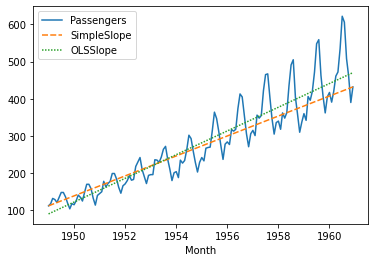

In [221]:
sns.lineplot(data=dfplot)

In [222]:
df['LogPassengers'] = np.log(df.Passengers)
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers
Month,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499
1949-02-01,118,114.237762,2,92.967146,4.770685
1949-03-01,132,116.475524,3,95.624330,4.882802
1949-04-01,129,118.713287,4,98.281513,4.859812
1949-05-01,121,120.951049,5,100.938697,4.795791


In [223]:
model = sm.ols(formula="LogPassengers ~ Trend", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogPassengers   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1300.
Date:                Mon, 23 May 2022   Prob (F-statistic):           2.41e-73
Time:                        16:46:54   Log-Likelihood:                 80.794
No. Observations:                 144   AIC:                            -157.6
Df Residuals:                     142   BIC:                            -151.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8137      0.023    206.648      0.000       4.768       4.860
Trend          0.0100      0.000     36.050      0.000       0.009       0.011
==============================================================================
Omnibus:                        3.750   Durbin-Watson:                   0.587
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.722
Skew:                           0.184   Prob(JB):                        0.256
Kurtosis:                       2.436   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
df['LogPsgOLS'] = results.params[0] + df['Trend']*results.params[1]

In [225]:
df['LogOLSSlope']=np.exp(df['LogPsgOLS'])
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope
Month,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699


<AxesSubplot:xlabel='Month'>

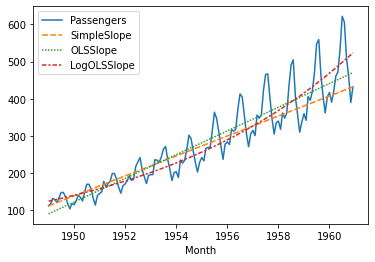

In [226]:
dfplot['LogOLSSlope'] = df.LogOLSSlope
sns.lineplot(data=dfplot)

In [227]:
df['MonthNum'] = df.index.month

In [228]:
df['LogChg'] = np.log(df.Passengers / df.Passengers.shift())

<AxesSubplot:xlabel='MonthNum', ylabel='LogChg'>

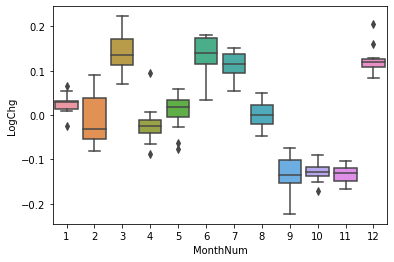

In [229]:
sns.boxplot(y="LogChg", x="MonthNum", data=df)

In [230]:
medians = df.filter(['MonthNum', 'LogChg']).groupby('MonthNum').median()
medians

,LogChg
MonthNum,
1,0.028988
2,-0.031428
3,0.135547
4,-0.023964
5,0.017882
6,0.139719
7,0.116310
8,0.000000
9,-0.134756


In [231]:
df = df.join(medians, on="MonthNum", how="left", lsuffix='', rsuffix='_median')
#df.merge(medians, how='left', on='MonthNum', suffixes=('','_median'))

df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median
Month,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882


In [232]:
means = df.filter(['MonthNum', 'LogChg']).groupby('MonthNum').mean()
df = df.join(means, on="MonthNum", how="left", lsuffix='', rsuffix='_mean')
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean
Month,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696


In [233]:
df['LogChg_median_cum'] = df['LogChg_median'].cumsum()
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean,LogChg_median_cum
Month,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154,0.028988
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986,-0.002440
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296,0.133107
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200,0.109143
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696,0.127024


In [234]:
df['LogPsgOLSSeason'] = df['LogPsgOLS'] + df['LogChg_median_cum']

In [235]:
df['LogOLSSeasonSlope']=np.exp(df['LogPsgOLSSeason'])
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean,LogChg_median_cum,LogPsgOLSSeason,LogOLSSeasonSlope
Month,,,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154,0.028988,4.852704,128.086293
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986,-0.002440,4.831325,125.376923
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296,0.133107,4.976920,145.027039
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200,0.109143,4.963004,143.022841
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696,0.127024,4.990934,147.073797


In [236]:
dfplot = df.filter(['Passengers', 'LogOLSSlope', 'LogOLSSeasonSlope'])

<AxesSubplot:xlabel='Month'>

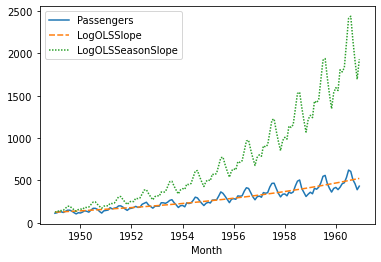

In [237]:
sns.lineplot(data=dfplot)

In [238]:
results.params[1]
#we need to adjust the logchg by the longterm month to month trend/increase

0.010048381741695136

In [239]:
adjmedian = medians - results.params[1]

df2 = df.join(adjmedian, on="MonthNum", how="left", lsuffix='', rsuffix='adjmedian')
df2.head()


,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean,LogChg_median_cum,LogPsgOLSSeason,LogOLSSeasonSlope,LogChgadjmedian
Month,,,,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154,0.028988,4.852704,128.086293,0.018939
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986,-0.002440,4.831325,125.376923,-0.041476
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296,0.133107,4.976920,145.027039,0.125499
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200,0.109143,4.963004,143.022841,-0.034013
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696,0.127024,4.990934,147.073797,0.007833


In [240]:
season_cumsum = []
LogChg_median = df2['LogChgadjmedian'].values[0:12]

for i in range(12):
    x = LogChg_median.cumsum()
    season_cumsum.append(x)

In [241]:
len(season_cumsum)
season_cumsum


[array([ 0.01893916, -0.02253723,  0.10296163,  0.06894901,  0.07678238,
         0.20645322,  0.31271452,  0.30266614,  0.15786216,  0.01968713,
        -0.12223405, -0.01184258]),
 array([ 0.01893916, -0.02253723,  0.10296163,  0.06894901,  0.07678238,
         0.20645322,  0.31271452,  0.30266614,  0.15786216,  0.01968713,
        -0.12223405, -0.01184258]),
 array([ 0.01893916, -0.02253723,  0.10296163,  0.06894901,  0.07678238,
         0.20645322,  0.31271452,  0.30266614,  0.15786216,  0.01968713,
        -0.12223405, -0.01184258]),
 array([ 0.01893916, -0.02253723,  0.10296163,  0.06894901,  0.07678238,
         0.20645322,  0.31271452,  0.30266614,  0.15786216,  0.01968713,
        -0.12223405, -0.01184258]),
 array([ 0.01893916, -0.02253723,  0.10296163,  0.06894901,  0.07678238,
         0.20645322,  0.31271452,  0.30266614,  0.15786216,  0.01968713,
        -0.12223405, -0.01184258]),
 array([ 0.01893916, -0.02253723,  0.10296163,  0.06894901,  0.07678238,
         0.206453

In [242]:
a = []
for list in season_cumsum:
    for element in list:
        a.append(element)


In [243]:
a

[0.01893915513155705,
 -0.02253722889256475,
 0.10296162562798568,
 0.06894901060031515,
 0.07678237982910263,
 0.20645321865626226,
 0.31271452248368903,
 0.3026661407419939,
 0.157862157604304,
 0.019687130352488535,
 -0.12223405004400878,
 -0.011842578404540186,
 0.01893915513155705,
 -0.02253722889256475,
 0.10296162562798568,
 0.06894901060031515,
 0.07678237982910263,
 0.20645321865626226,
 0.31271452248368903,
 0.3026661407419939,
 0.157862157604304,
 0.019687130352488535,
 -0.12223405004400878,
 -0.011842578404540186,
 0.01893915513155705,
 -0.02253722889256475,
 0.10296162562798568,
 0.06894901060031515,
 0.07678237982910263,
 0.20645321865626226,
 0.31271452248368903,
 0.3026661407419939,
 0.157862157604304,
 0.019687130352488535,
 -0.12223405004400878,
 -0.011842578404540186,
 0.01893915513155705,
 -0.02253722889256475,
 0.10296162562798568,
 0.06894901060031515,
 0.07678237982910263,
 0.20645321865626226,
 0.31271452248368903,
 0.3026661407419939,
 0.157862157604304,
 0.019

In [244]:
df2['LogChg_median_cum_season'] = a


In [245]:
df2['LogPsgOLSSeason'] = df2['LogPsgOLS'] + df2['LogChg_median_cum_season']
df2['LogOLSSeasonSlope']=np.exp(df2['LogPsgOLSSeason'])
df2.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean,LogChg_median_cum,LogPsgOLSSeason,LogOLSSeasonSlope,LogChgadjmedian,LogChg_median_cum_season
Month,,,,,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154,0.028988,4.842656,126.805678,0.018939,0.018939
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986,-0.002440,4.811228,122.882402,-0.041476,-0.022537
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296,0.133107,4.946775,140.720416,0.125499,0.102962
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200,0.109143,4.922811,137.388245,-0.034013,0.068949
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696,0.127024,4.940693,139.867084,0.007833,0.076782


In [246]:
df2plot = df2.filter(['Passengers', 'LogOLSSlope', 'LogOLSSeasonSlope'])

<AxesSubplot:xlabel='Month'>

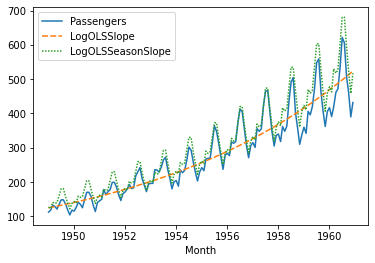

In [247]:

sns.lineplot(data=df2plot)

In [248]:
df2

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean,LogChg_median_cum,LogPsgOLSSeason,LogOLSSeasonSlope,LogChgadjmedian,LogChg_median_cum_season
Month,,,,,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154,0.028988,4.842656,126.805678,0.018939,0.018939
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986,-0.002440,4.811228,122.882402,-0.041476,-0.022537
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296,0.133107,4.946775,140.720416,0.125499,0.102962
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200,0.109143,4.922811,137.388245,-0.034013,0.068949
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696,0.127024,4.940693,139.867084,0.007833,0.076782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,423.048951,140,459.658525,6.406880,6.220442,502.925338,8,-0.026060,0.000000,0.000774,1.579171,6.523108,680.690597,-0.010048,0.302666
1960-09-01,508,425.286713,141,462.315709,6.230481,6.230490,508.004399,9,-0.176399,-0.134756,-0.134566,1.444416,6.388352,594.875575,-0.144804,0.157862
1960-10-01,461,427.524476,142,464.972893,6.133398,6.240538,513.134754,10,-0.097083,-0.128127,-0.128089,1.316289,6.260226,523.337002,-0.138175,0.019687


In [249]:
dummies=pd.get_dummies(df2['MonthNum'], drop_first = True, prefix = 'm', prefix_sep= '_')
dummies


,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
Month,,,,,,,,,,,
1949-01-01,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,0,0,0,0,0,0,1,0,0,0,0
1960-09-01,0,0,0,0,0,0,0,1,0,0,0
1960-10-01,0,0,0,0,0,0,0,0,1,0,0


In [250]:
df2 = df2.merge(dummies, how='left', on='Month')

In [251]:
df2.dtypes

Passengers                    int64
SimpleSlope                 float64
Trend                         int64
OLSSlope                    float64
LogPassengers               float64
LogPsgOLS                   float64
LogOLSSlope                 float64
MonthNum                      int64
LogChg                      float64
LogChg_median               float64
LogChg_mean                 float64
LogChg_median_cum           float64
LogPsgOLSSeason             float64
LogOLSSeasonSlope           float64
LogChgadjmedian             float64
LogChg_median_cum_season    float64
m_2                           uint8
m_3                           uint8
m_4                           uint8
m_5                           uint8
m_6                           uint8
m_7                           uint8
m_8                           uint8
m_9                           uint8
m_10                          uint8
m_11                          uint8
m_12                          uint8
dtype: object

In [266]:
# endogenous variable is log passengers because we agreed on tht it is a multiplicative and not additive case
# exogenous variables is time (here 'trend'), and the 11 dummies (we need to drop one otherwise we would have a perfect multicollinearity, or just choose 11 of the twelve dummies)
# run regression and calculate y hat 
# apply ols

import statsmodels.formula.api as sm

#create object that contains only the exogenous variables


dfx = df2.filter(like='m_')
del dfx['LogChg_median_cum_season']
dfx['Trend'] = df2['Trend']
dfx


dfx1 = df2.filter(regex = "m_|Trend") #pretty useful here



C:\Users\wh\AppData\Local\Temp/ipykernel_35420/1345471670.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['Trend'] = df2['Trend']


In [270]:
dfx1
del dfx1['LogChg_median_cum_season']


KeyError: 'LogChg_median_cum_season'

In [274]:
dfx1

,Trend,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
Month,,,,,,,,,,,,
1949-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,2,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,3,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,4,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,5,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,140,0,0,0,0,0,0,1,0,0,0,0
1960-09-01,141,0,0,0,0,0,0,0,1,0,0,0
1960-10-01,142,0,0,0,0,0,0,0,0,1,0,0


In [275]:
dfx

,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,Trend
Month,,,,,,,,,,,,
1949-01-01,0,0,0,0,0,0,0,0,0,0,0,1
1949-02-01,1,0,0,0,0,0,0,0,0,0,0,2
1949-03-01,0,1,0,0,0,0,0,0,0,0,0,3
1949-04-01,0,0,1,0,0,0,0,0,0,0,0,4
1949-05-01,0,0,0,1,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,0,0,0,0,0,0,1,0,0,0,0,140
1960-09-01,0,0,0,0,0,0,0,1,0,0,0,141
1960-10-01,0,0,0,0,0,0,0,0,1,0,0,142


In [279]:
#approach1
model2 = sm.ols(formula="LogPassengers ~ Trend + C(MonthNum)", data=df2)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogPassengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     649.4
Date:                Mon, 23 May 2022   Prob (F-statistic):          2.31e-110
Time:                        17:05:11   Log-Likelihood:                 209.30
No. Observations:                 144   AIC:                            -392.6
Df Residuals:                     131   BIC:                            -354.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.7268      0.019    250.180      0.000       4.689       4.764
C(MonthNum)[T.2]     -0.0221      0.024     -0.911      0.364      -0.070       0.026
C(MonthNum)[T.3]      0.1082      0.024      4.468      0.000       0.060       0.156
C(MonthNum)[T.4]      0.0769      0.024      3.176      0.002       0.029       0.125
C(MonthNum)[T.5]      0.0745      0.024      3.078      0.003       0.027       0.122
C(MonthNum)[T.6]      0.1967      0.024      8.121      0.000       0.149       0.245
C(MonthNum)[T.7]      0.3006      0.024     12.411      0.000       0.253       0.349
C(MonthNum)[T.8]      0.2913      0.024     12.026      0.000       0.243       0.339
C(MonthNum)[T.9]      0.1467      0.024      6.054      0.000       0.099       0.195
C(MonthNum)[T.10]     0.0085      0.024      0.352      0.725      -0.039       0.056
C(MonthNum)[T.11]    -0.1352      0.024     -5.577      0.000      -0.183      -0.087
C(MonthNum)[T.12]    -0.0213      0.024     -0.879      0.381      -0.069       0.027
Trend                 0.0101      0.000     84.399      0.000       0.010       0.010
==============================================================================
Omnibus:                        2.692   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.412
Skew:                          -0.224   Prob(JB):                        0.299
Kurtosis:                       2.551   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [283]:
#approach2, what if we take another one, the stanndard one without 'formula'
import statsmodels.api as sm
#we don't have a constant here, so we have to add it here, otherwise we get other results thean in the first ols model

#to add constantwe have to do it in the x variable!
dfx = sm.add_constant(dfx)


model3 = sm.OLS(df.LogPassengers, dfx)
results = model3.fit()
results.summary()

c:\Users\wh\anaconda3_python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogPassengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     649.4
Date:                Mon, 23 May 2022   Prob (F-statistic):          2.31e-110
Time:                        17:11:36   Log-Likelihood:                 209.30
No. Observations:                 144   AIC:                            -392.6
Df Residuals:                     131   BIC:                            -354.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7268      0.019    250.180      0.000       4.689       4.764
m_2           -0.0221      0.024     -0.911      0.364      -0.070       0.026
m_3            0.1082      0.024      4.468      0.000       0.060       0.156
m_4            0.0769      0.024      3.176      0.002       0.029       0.125
m_5            0.0745      0.024      3.078      0.003       0.027       0.122
m_6            0.1967      0.024      8.121      0.000       0.149       0.245
m_7            0.3006      0.024     12.411      0.000       0.253       0.349
m_8            0.2913      0.024     12.026      0.000       0.243       0.339
m_9            0.1467      0.024      6.054      0.000       0.099       0.195
m_10           0.0085      0.024      0.352      0.725      -0.039       0.056
m_11          -0.1352      0.024     -5.577      0.000      -0.183      -0.087
m_12          -0.0213      0.024     -0.879      0.381      -0.069       0.027
Trend          0.0101      0.000     84.399      0.000       0.010       0.010
==============================================================================
Omnibus:                        2.692   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.412
Skew:                          -0.224   Prob(JB):                        0.299
Kurtosis:                       2.551   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [285]:
# interpretation
#we have a 1 percent increase from month to onth (Trend)
#in january one percent (intercept coeff)
#in m2 we have one percent + coef of m_2
#.....


#dir() gives all options
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [287]:
fitted_values = results.fittedvalues

In [289]:
df2['FinalReg'] = np.exp(results.fittedvalues)



<AxesSubplot:xlabel='Month'>

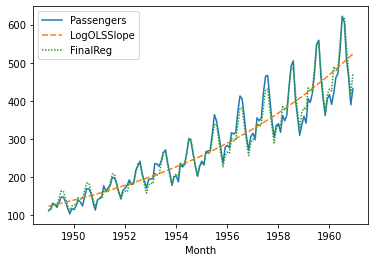

In [292]:
df2plot = df2.filter(['Passengers', 'LogOLSSlope', 'FinalReg'])
sns.lineplot(data=df2plot)

<AxesSubplot:xlabel='Month'>

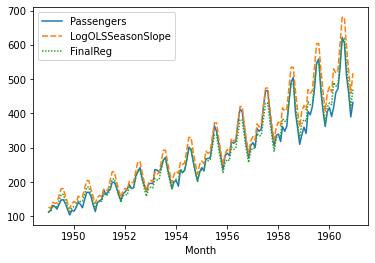

In [295]:
df3plot = df2.filter(['Passengers', 'LogOLSSeasonSlope', 'FinalReg'])
sns.lineplot(data=df3plot)

In [296]:
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt


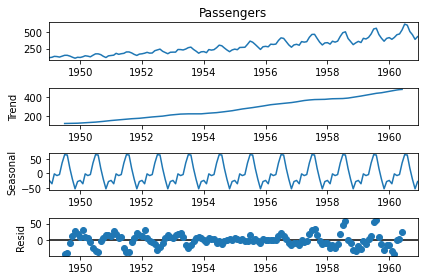

In [298]:
decompose = seasonal_decompose(df['Passengers'],model='additive', period=12)
decompose.plot()
plt.show()

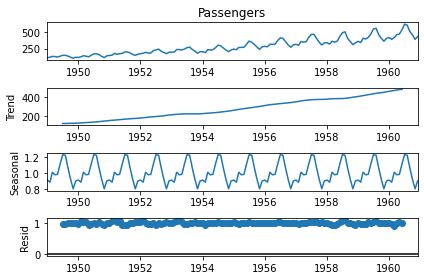

In [299]:
decompose = seasonal_decompose(df['Passengers'],model='multiplicative', period=12)
decompose.plot()
plt.show()

In [ ]:
#why do we take sum of squared errors instead of absolute errors(negative errors put into positive)
#by taking into the power of two we weight the errors
#so we prefer more small errors than less big errors

#large errors mean that there is something wrong with the model, that's wy we prefer small errors
#small errors are kind of natural

In [ ]:
#can r-squared be used everywhere? yes we can, when we have a vecrtor of fitted values and one with true values we can calculate r-squared
#rr-squared is the correlation between the fitted values vector and true values vector taken into the power of two


That's not good - how do we correct that?